<a href="https://colab.research.google.com/github/ArpitaChatterjee/Business-Analysis/blob/main/BusinessAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inorder to see how different group engage with my business, I'll take an event like "Thanksgiving Day", and predict the amount of sale happens on that day. Hence determine my audiance

In [1]:
#imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold

In [3]:
#demo-dataset of sale in an event 
train= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BusinessAnalysis/train-retail/train.csv")
test= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BusinessAnalysis/test-retail/test.csv")

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


1. User_ID: Unique identifier of shopper.
2. Product_ID: Unique identifier of product. (No key given)
3. Gender: Sex of shopper.
4. Age: Age of shopper split into bins.
5. Occupation: Occupation of shopper. (No key given)
6. City_Category: Residence location of shopper. (No key given)
7. Stay_In_Current_City_Years: Number of years stay in current city.
8. Marital_Status: Marital status of shopper
9. Product_Category_1, Product_Category_2, Product_Category_3: Product category of purchase.
10. Purchase: Purchase amount in dollars.





In [5]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
train.shape

(550068, 12)

In [7]:
test.shape

(233599, 11)

In [8]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
m= train["Gender"].value_counts()
m

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
age= train["Age"].value_counts()
age

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [64]:
fig=px.bar(age,y=age,x=age.index,color=age.index,template='ggplot2')
fig.update_layout(
    xaxis_title= 'Age',
    yaxis_title="Count",
  # legend_title='Age',
   # font_family="Courier New",
    #font_color="black",
   # title_font_family="Times New Roman",
    #title_font_color="red",
    #legend="green"
)
fig.show()

The graph shows age- 18-45 are more engaged with the sale 

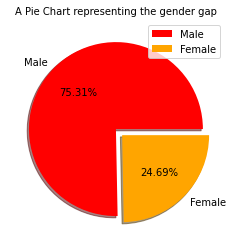

In [33]:
labels = ['Male', 'Female']
colors = ['Red', 'Orange']
explode = [0, 0.1]

plt.pie(m, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 10)
plt.legend()
plt.show()

It shows that males are the prime buyers of the products 

In [34]:
train[['Product_Category_1','Product_Category_2','Product_Category_3']].groupby(train['Gender']).mean()

,Product_Category_1,Product_Category_2,Product_Category_3
Gender,,,
F,5.717714,10.009166,12.453556
M,5.301512,9.788729,12.730699


In [35]:
train[['Product_Category_1','Product_Category_2','Product_Category_3']].groupby(train['User_ID']).count()

,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,,,
1000001,35,21,14
1000002,77,54,26
1000003,29,23,13
1000004,14,12,9
1000005,106,58,16
...,...,...,...
1006036,514,319,110
1006037,122,74,33
1006038,12,9,3


Amongst the 55k+ list of sales, UserId 'a' purchases "x" no of Product1, 'y' no of Product2 n "z" noof product3 

In [36]:
train.groupby('User_ID').Product_ID.count()

User_ID
1000001     35
1000002     77
1000003     29
1000004     14
1000005    106
          ... 
1006036    514
1006037    122
1006038     12
1006039     74
1006040    180
Name: Product_ID, Length: 5891, dtype: int64

In [37]:
train['Product_ID'].value_counts()[:5]

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64

Product Id "a" is total sale of "X" nos.

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


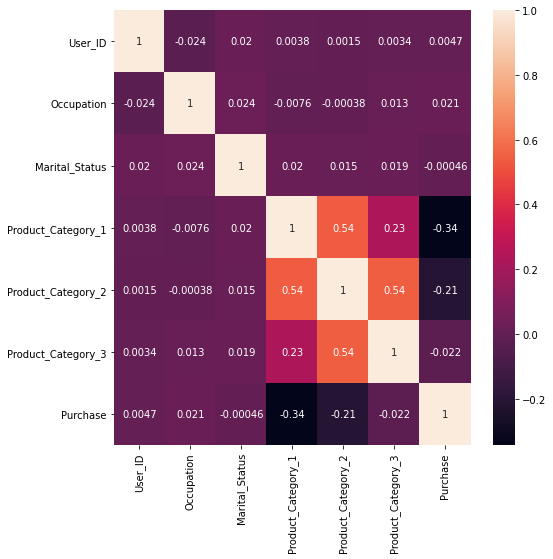

In [39]:
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True)
plt.show()


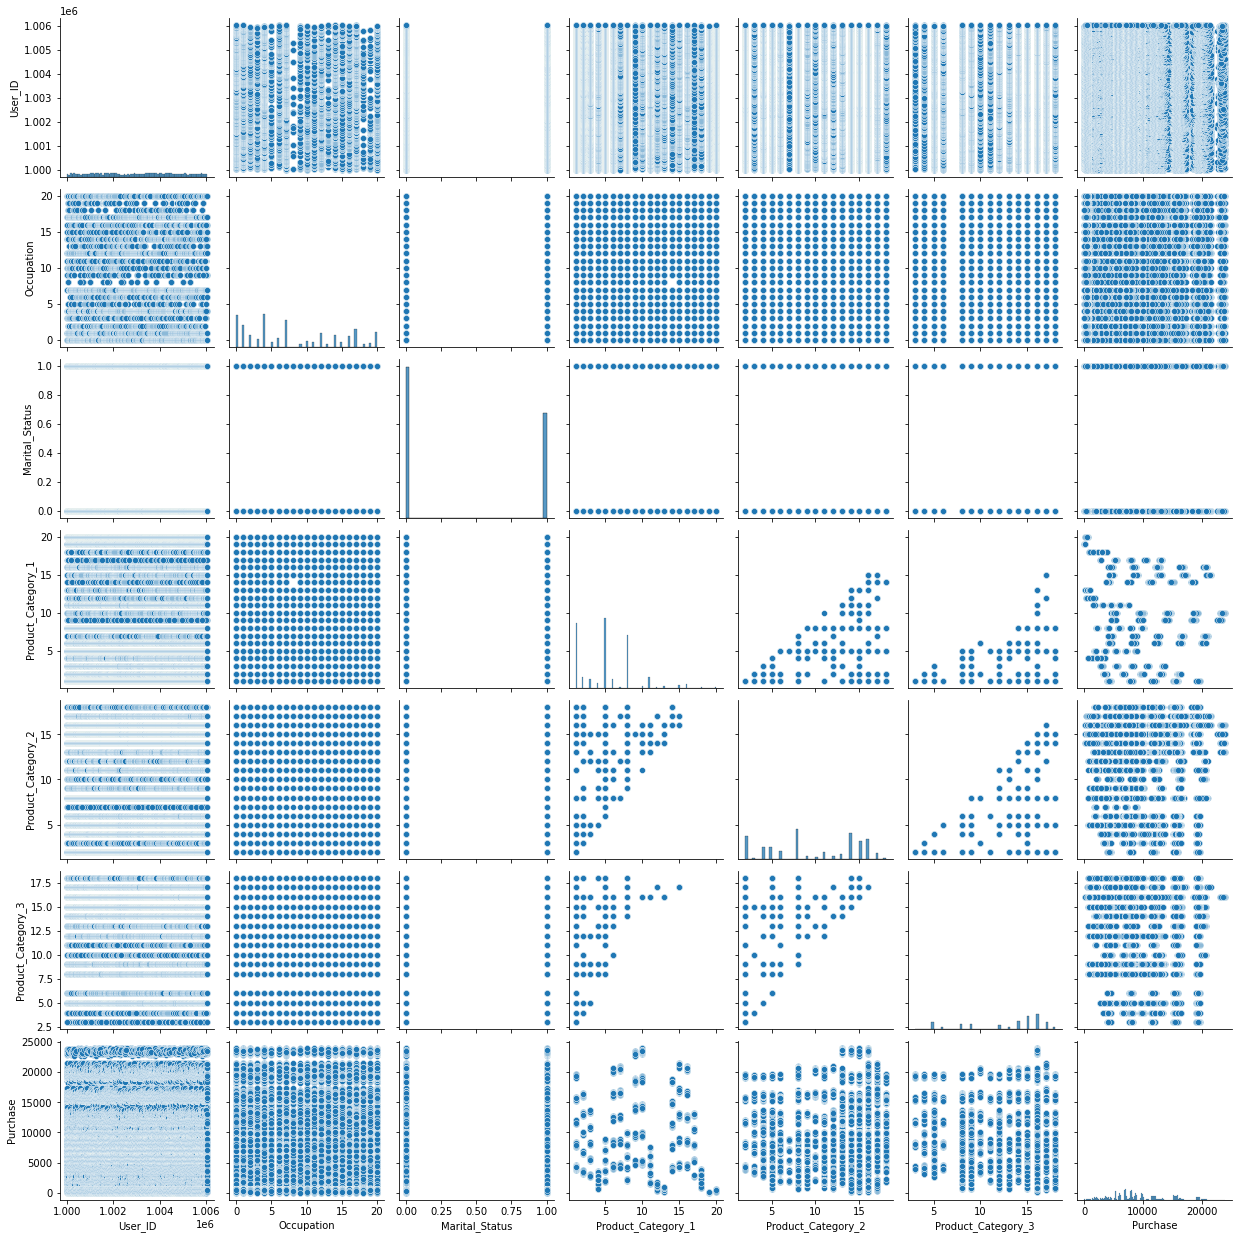

In [40]:
sns.pairplot(train)
plt.show()

The Above pairplot graph shows that "Occupation"  of the customer is the main factor according to which sales of Product1,2,3 depends.

In [41]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


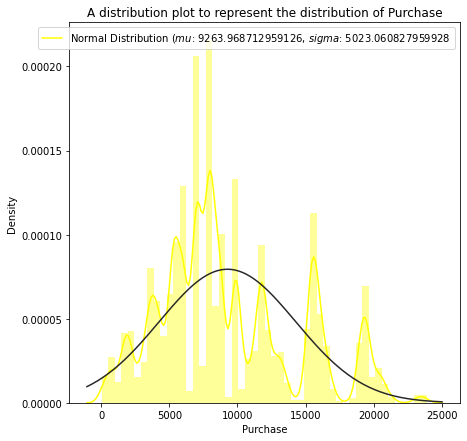

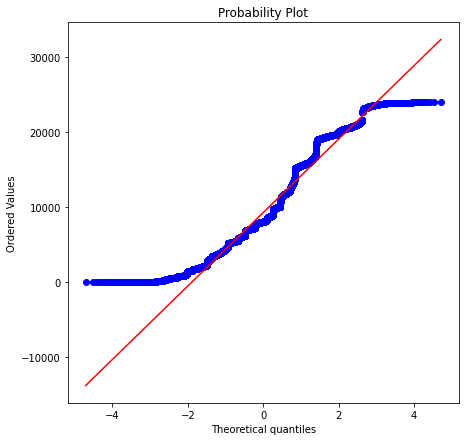

In [43]:
# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(train['Purchase'], color = 'Yellow', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(train['Purchase'], plot = plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



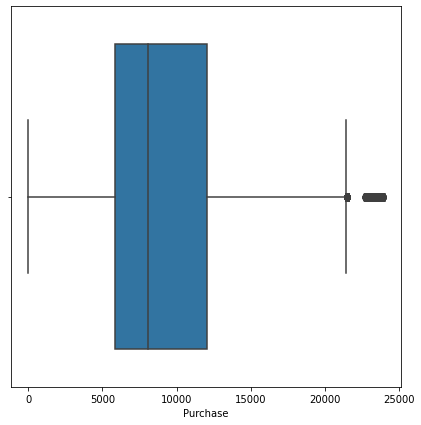

In [44]:
sns.boxplot(train['Purchase'])

This shows the main purchases are from 5000-10000 units

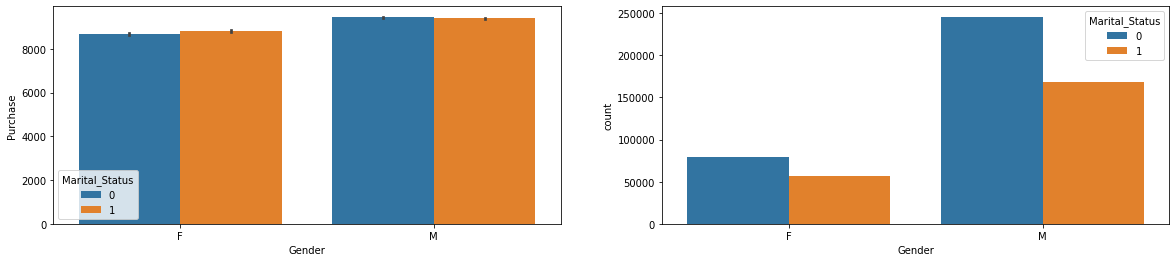

In [45]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean,data=train,ax=ax[0])
sns.countplot(x="Gender",hue="Marital_Status",data=train,ax=ax[1])


This shows the  Married Men are the main buyers 

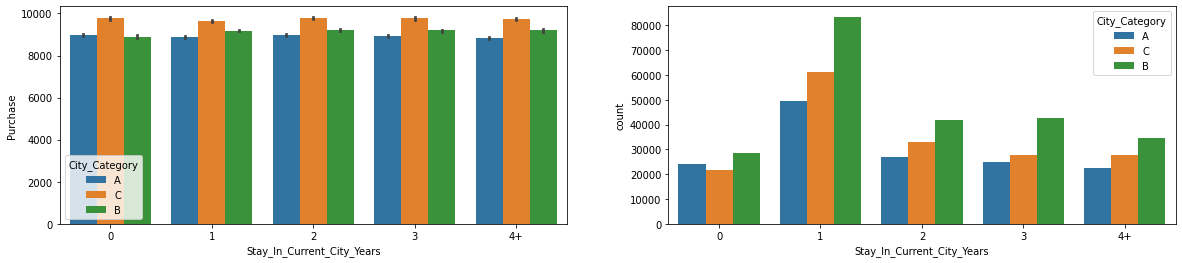

In [46]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="City_Category",order=["0","1","2","3","4+"],estimator=np.mean,data=train,ax=ax[0])
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",order=["0","1","2","3","4+"],data=train,ax=ax[1])

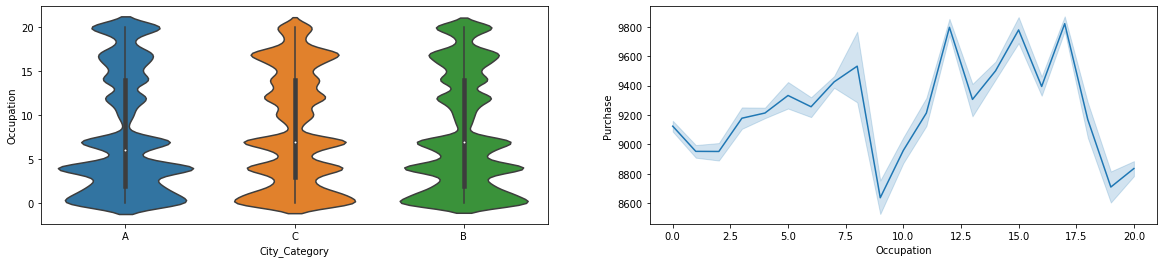

In [47]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="City_Category",y="Occupation",data=train,ax=ax[0])
sns.lineplot(x="Occupation",y="Purchase",data=train,ax=ax[1])

This implies that Occupation of City A better than C which is better than B.
Hence City A with good Occupation has more Purchases than City B ,and C.

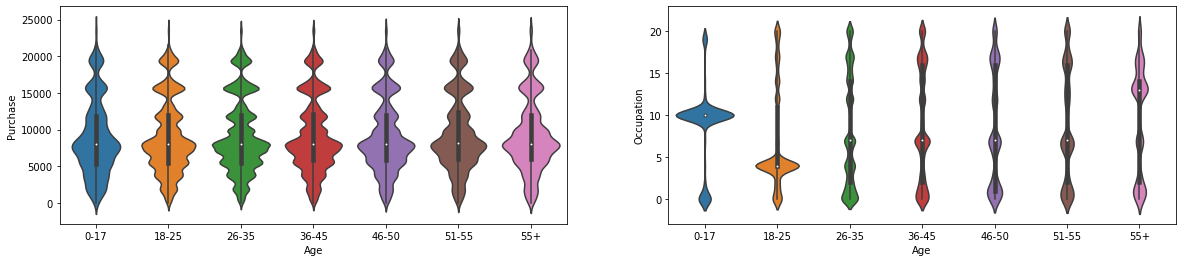

In [48]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="Age",y="Purchase",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=train,ax=ax[0])
sns.violinplot(x="Age",y="Occupation",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=train,ax=ax[1])

This shows that Age ranging between 18-50 are has the main purchase

In [49]:
test_copy=test.copy()

In [50]:
train['Product_Category_2'].fillna(train['Product_Category_2'].mean(),inplace=True)

test['Product_Category_2'].fillna(test['Product_Category_2'].mean(),inplace=True)

In [51]:
train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0],inplace=True)

test['Product_Category_3'].fillna(test['Product_Category_3'].mode()[0],inplace=True)

In [52]:
train['Product_Category_1']=np.sqrt(train['Product_Category_1'])
test['Product_Category_1']=np.sqrt(test['Product_Category_1'])

In [53]:
le= LabelEncoder()
train['Product_ID']=le.fit_transform(train['Product_ID'])
columns=[]
for col in train.columns:
    if train[col].dtypes=='object':
        columns.append(col)


In [54]:
train_encode=pd.get_dummies(train,columns=columns,dtype=np.uint8)
test_encode=pd.get_dummies(test,columns=columns,dtype=np.uint8)

In [55]:
test_encode['Product_ID']=le.fit_transform(test_encode['Product_ID'])
y=train_encode['Purchase']
X=train_encode.drop(['Purchase'],axis=1)

In [56]:
from sklearn.preprocessing import StandardScaler
col=X.columns
ind=X.index
colum=test_encode.columns
index=test_encode.index
scl=StandardScaler()
X=scl.fit_transform(X)
X=pd.DataFrame(X,columns=col,index=ind)
test_encode=scl.fit_transform(test_encode)
test_encode=pd.DataFrame(test_encode,columns=colum,index=index)

In [57]:
def metrics(true,pred):
    return sqrt(mean_squared_error(true,pred))

In [58]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

In [65]:
xgb=XGBRegressor(random_state=1,n_estimators= 61, max_depth=11)
xgb.fit(xtr,ytr)
pre=xgb.predict(xvl)
print(metrics(yvl,pre))
result=xgb.predict(test_encode)
test_copy['Purchase']=result
submission = test_copy[['Purchase','User_ID','Product_ID', 'Occupation', 'Gender']]
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/BusinessAnalysis/Submission.csv', index=False)

[17:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2612.204764692091


In the Submission CSV file we can see Userid "A" purchased "X" units of product "Y". Hence we can see a sale is more affected depending on the event and the occupation of the buyers hence their Demographics, thier gender, plays an important role in the Sale of a Product in an Event.